In [1]:
%load_ext autoreload
%autoreload 2

In [126]:
from s1_frame_enumerator import get_s1_stack, filter_s1_stack_by_geometric_coverage_per_pass, get_global_s1_frames, get_overlapping_s1_frames, enumerate_dates, frames2gdf
from s1_frame_enumerator.s1_formatter import S1_COLUMNS 
from shapely.geometry import Point
import asf_search as asf
import geopandas as gpd
from rasterio.crs import CRS
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from tqdm import tqdm
import warnings

In [3]:
df_global_frames = get_global_s1_frames()

In [4]:
#df_global_frames.relative_orbit_numbers.unique()

In [5]:
geo = Point(-120.5, 34.95).buffer(.5)

df_geo = gpd.GeoDataFrame(geometry=[geo], crs=CRS.from_epsg(4326))

In [10]:
frames = get_overlapping_s1_frames(geo, track_numbers=[144])
frames

[S1Frame(frame_geometry=<POLYGON Z ((-119.344 34.064 0, -119.355 34.016 0, -119.853 34.089 0, -120.2...>, frame_id=19966, track_numbers=[144], use_land_mask=True, coverage_geometry=<POLYGON Z ((-120.928 35.407 0, -120.928 35.407 0, -120.903 35.534 0, -120.9...>),
 S1Frame(frame_geometry=<POLYGON Z ((-119.635 32.735 0, -119.645 32.687 0, -120.136 32.76 0, -120.57...>, frame_id=19967, track_numbers=[144], use_land_mask=True, coverage_geometry=<POLYGON Z ((-120.261 34.457 0, -120.249 34.514 0, -119.777 34.443 0, -119.3...>)]

<AxesSubplot: >

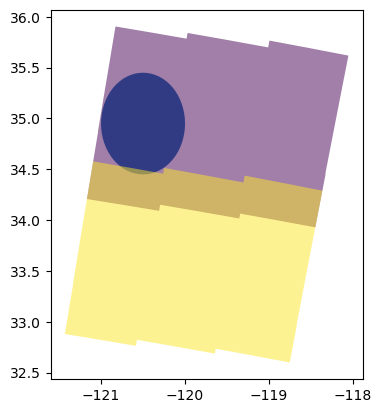

In [14]:
fig, ax = plt.subplots()

df_geo.plot(ax=ax)
df_overlapping_frames = frames2gdf(frames)
df_overlapping_frames.plot(column='frame_id', alpha=.5, ax=ax)

<AxesSubplot: >

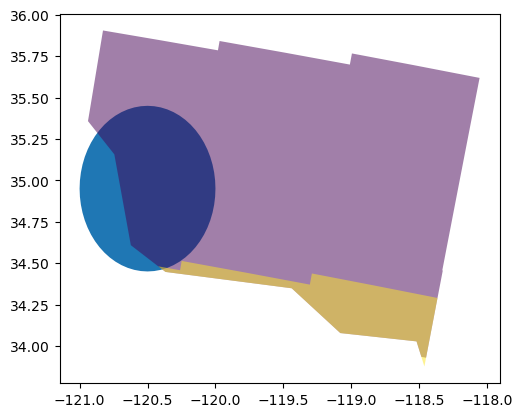

In [24]:
fig, ax = plt.subplots()

df_geo.plot(ax=ax)
df_overlapping_frames_c = frames2gdf(frames, use_coverage_geometry=True)
df_overlapping_frames_c.plot(column='frame_id', alpha=.5, ax=ax)

In [25]:
df_overlapping_frames.head()

,frame_id,track_numbers,use_land_mask,coverage_geometry,geometry
0,19966,144,True,"POLYGON Z ((-120.928078 35.407432 0, -120.9280...","POLYGON Z ((-119.34410 34.06389 0.00000, -119...."
1,19967,144,True,POLYGON Z ((-120.26054732962436 34.45729780898...,"POLYGON Z ((-119.63451 32.73493 0.00000, -119...."


In [26]:
df = get_s1_stack(frames)
df.head()

/Users/cmarshak/bekaert-team/s1-frame-enumerator/s1_frame_enumerator/s1_stack.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection_area = df_stack_one_pass.geometry.intersection(total_coverage_geometry).area / total_coverage_area


,slc_id,start_time,stop_time,url,track_number,polarization,orbit,beam_mode,size_gb,stack_repeat_pass_id,repeat_pass_date,geometry
0,S1A_IW_SLC__1SSV_20150519T135947_20150519T1400...,2015-05-19 13:59:47+00:00,2015-05-19 14:00:14+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,144,VV,5991,IW,2.482766,8,2015-05-19,"POLYGON ((-118.37766 34.31689, -117.98006 35.9..."
1,S1A_IW_SLC__1SSV_20150519T140012_20150519T1400...,2015-05-19 14:00:12+00:00,2015-05-19 14:00:39+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,144,VV,5991,IW,2.279615,8,2015-05-19,"POLYGON ((-118.71146 32.81956, -118.33259 34.4..."
2,S1A_IW_SLC__1SSV_20150612T135948_20150612T1400...,2015-06-12 13:59:48+00:00,2015-06-12 14:00:15+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,144,VV,6341,IW,2.429534,10,2015-06-12,"POLYGON ((-118.35521 34.37390, -117.97107 35.9..."
3,S1A_IW_SLC__1SSV_20150612T140013_20150612T1400...,2015-06-12 14:00:13+00:00,2015-06-12 14:00:41+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,144,VV,6341,IW,2.246577,10,2015-06-12,"POLYGON ((-118.70536 32.81818, -118.31420 34.5..."
4,S1A_IW_SLC__1SSV_20150706T135948_20150706T1400...,2015-07-06 13:59:48+00:00,2015-07-06 14:00:15+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,144,VV,6691,IW,2.428954,12,2015-07-06,"POLYGON ((-118.35507 34.37413, -117.97090 35.9..."


In [27]:
df.shape

(709, 12)

In [29]:
dates = df.repeat_pass_date.unique().tolist()
dates[:4]

[datetime.date(2015, 5, 19),
 datetime.date(2015, 6, 12),
 datetime.date(2015, 7, 6),
 datetime.date(2015, 7, 30)]

In [30]:
ifg_pairs = enumerate_dates(dates, 30)
ifg_pairs[0]

(datetime.date(2022, 12, 20), datetime.date(2022, 11, 14))

In [31]:
ref_dates, sec_dates = zip(*ifg_pairs)

In [127]:
def select_ifg_pair_from_stack(ref_date, sec_date, frame, df_stack, use_land_mask=True) -> dict:
    
    intersection_geo = df_stack.intersection(frame.coverage_geometry)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)
        coverage_ratio = intersection_geo.area / frame.coverage_geometry.area
    geo_ind = coverage_ratio >= .01
    df_stack_frame = df_stack[geo_ind].reset_index(drop=True)
    
    df_ref = df_stack_frame[df_stack_frame.repeat_pass_date == ref_date].reset_index(drop=True)
    df_sec = df_stack_frame[df_stack_frame.repeat_pass_date == sec_date].reset_index(drop=True)
    
    return {'reference': df_ref.slc_id.tolist(),
            'secondary': df_sec.slc_id.tolist(),
            'frame_id': frame.frame_id,
            'geometry': frame.coverage_geometry}

In [128]:
K = 101

ifg_data = select_ifg_pair_from_stack(ref_dates[K], sec_dates[K], frames[0], df)
ifg_data

{'reference': ['S1A_IW_SLC__1SDV_20211014T140016_20211014T140043_040116_04C011_09E8',
  'S1A_IW_SLC__1SDV_20211014T140041_20211014T140108_040116_04C011_2151',
  'S1B_IW_SLC__1SDV_20211020T135942_20211020T140009_029220_037CBD_1FF9'],
 'secondary': ['S1A_IW_SLC__1SDV_20210815T140014_20210815T140041_039241_04A1FD_E1BA',
  'S1A_IW_SLC__1SDV_20210815T140039_20210815T140106_039241_04A1FD_C7C4',
  'S1B_IW_SLC__1SDV_20210821T135940_20210821T140007_028345_0361D2_70E6'],
 'frame_id': 19966,
 'geometry': <POLYGON Z ((-120.928 35.407 0, -120.928 35.407 0, -120.903 35.534 0, -120.9...>}

In [129]:
df_ref = df[df.slc_id.isin(ifg_data['reference'])].copy()
df_sec = df[df.slc_id.isin(ifg_data['secondary'])].copy()

<AxesSubplot: >

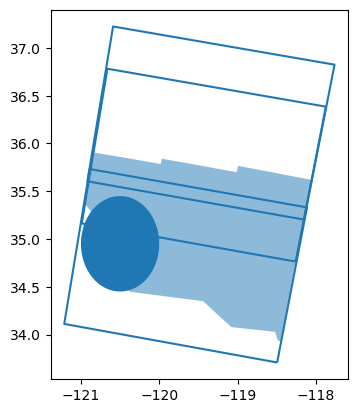

In [130]:
fig, ax = plt.subplots()

df_geo.plot(ax=ax)
df_ref.boundary.plot(ax=ax)
df_f = frames2gdf(frames[:1], use_coverage_geometry=True)
df_f.plot(ax=ax, alpha=.5)
#df_overlapping_frames_c.plot(column='frame_id', alpha=.5, ax=ax)

<AxesSubplot: >

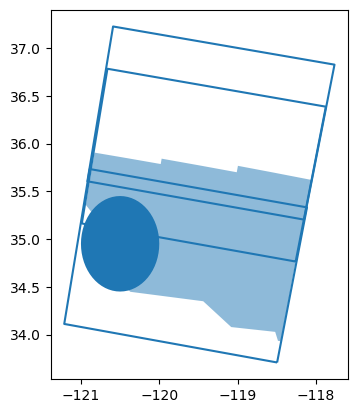

In [131]:
fig, ax = plt.subplots()

df_geo.plot(ax=ax)
df_sec.boundary.plot(ax=ax)
df_f = frames2gdf(frames[:1], use_coverage_geometry=True)
df_f.plot(ax=ax, alpha=.5)
#df_overlapping_frames_c.plot(column='frame_id', alpha=.5, ax=ax)

In [132]:
from typing import List

def enumerate_gunw_time_series(frames, 
                               df_stack, 
                               min_temporal_baseline_days,
                               n_secondary_scenes_per_ref=3,
                               use_land_mask=True
                               )-> List[dict]:
    dates = df.repeat_pass_date.unique().tolist()
    ifg_dates = enumerate_dates(dates, 
                                min_temporal_baseline_days,
                                n_secondary_scenes_per_ref=n_secondary_scenes_per_ref)
    ref_dates, sec_dates = zip(*ifg_dates)
    
    ifg_data = [select_ifg_pair_from_stack(ref_date, sec_date, frame, df_stack, use_land_mask=use_land_mask)
                for frame in tqdm(frames, desc='frames')
                for (ref_date, sec_date) in tqdm(ifg_dates, desc='Date Pairs') ]
    return ifg_data

In [133]:
data = enumerate_gunw_time_series(frames, df, 30)



frames:   0%|                                   | 0/2 [00:00<?, ?it/s]


Date Pairs:   0%|                             | 0/639 [00:00<?, ?it/s]


Date Pairs:   0%|                     | 3/639 [00:00<00:30, 21.02it/s]


Date Pairs:   1%|▏                    | 6/639 [00:00<00:30, 20.70it/s]


Date Pairs:   1%|▎                    | 9/639 [00:00<00:30, 20.74it/s]


Date Pairs:   2%|▍                   | 12/639 [00:00<00:30, 20.74it/s]


Date Pairs:   2%|▍                   | 15/639 [00:00<00:29, 20.83it/s]


Date Pairs:   3%|▌                   | 18/639 [00:00<00:30, 20.64it/s]


Date Pairs:   3%|▋                   | 21/639 [00:01<00:30, 20.37it/s]


Date Pairs:   4%|▊                   | 24/639 [00:01<00:30, 20.23it/s]


Date Pairs:   4%|▊                   | 27/639 [00:01<00:30, 20.10it/s]


Date Pairs:   5%|▉                   | 30/639 [00:01<00:29, 20.38it/s]


Date Pairs:   5%|█                   | 33/639 [00:01<00:29, 20.50it/s]


Date Pairs:   6%|█▏                  | 36/639 [00

Date Pairs:  46%|████████▋          | 294/639 [00:14<00:16, 20.64it/s]


Date Pairs:  46%|████████▊          | 297/639 [00:14<00:16, 20.65it/s]


Date Pairs:  47%|████████▉          | 300/639 [00:14<00:16, 20.67it/s]


Date Pairs:  47%|█████████          | 303/639 [00:14<00:16, 20.75it/s]


Date Pairs:  48%|█████████          | 306/639 [00:14<00:16, 20.63it/s]


Date Pairs:  48%|█████████▏         | 309/639 [00:15<00:16, 20.54it/s]


Date Pairs:  49%|█████████▎         | 312/639 [00:15<00:15, 20.48it/s]


Date Pairs:  49%|█████████▎         | 315/639 [00:15<00:15, 20.55it/s]


Date Pairs:  50%|█████████▍         | 318/639 [00:15<00:15, 20.52it/s]


Date Pairs:  50%|█████████▌         | 321/639 [00:15<00:15, 20.58it/s]


Date Pairs:  51%|█████████▋         | 324/639 [00:15<00:15, 20.62it/s]


Date Pairs:  51%|█████████▋         | 327/639 [00:15<00:15, 20.78it/s]


Date Pairs:  52%|█████████▊         | 330/639 [00:16<00:14, 20.81it/s]


Date Pairs:  52%|█████████▉         | 333/639 [00:1

Date Pairs:  92%|█████████████████▌ | 591/639 [00:28<00:02, 20.78it/s]


Date Pairs:  93%|█████████████████▋ | 594/639 [00:29<00:02, 20.76it/s]


Date Pairs:  93%|█████████████████▊ | 597/639 [00:29<00:02, 20.68it/s]


Date Pairs:  94%|█████████████████▊ | 600/639 [00:29<00:01, 20.55it/s]


Date Pairs:  94%|█████████████████▉ | 603/639 [00:29<00:01, 20.18it/s]


Date Pairs:  95%|██████████████████ | 606/639 [00:29<00:01, 20.27it/s]


Date Pairs:  95%|██████████████████ | 609/639 [00:29<00:01, 20.35it/s]


Date Pairs:  96%|██████████████████▏| 612/639 [00:29<00:01, 20.49it/s]


Date Pairs:  96%|██████████████████▎| 615/639 [00:30<00:01, 20.50it/s]


Date Pairs:  97%|██████████████████▍| 618/639 [00:30<00:01, 20.52it/s]


Date Pairs:  97%|██████████████████▍| 621/639 [00:30<00:00, 20.40it/s]


Date Pairs:  98%|██████████████████▌| 624/639 [00:30<00:00, 20.40it/s]


Date Pairs:  98%|██████████████████▋| 627/639 [00:30<00:00, 20.52it/s]


Date Pairs:  99%|██████████████████▋| 630/639 [00:3

In [134]:
len(data)

1278